In [4]:
import numpy as np

In [5]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series, DataFrame

<p> Exercise 1: Test scores </p>
<p?>
Create a series of 10 elements, random integers from 70 to 100, representing scores on a monthly exam. Set the index to be the month names, starting in September and ending in June.
</p>

With this series, write code to answer the following questions:
<p>
What is the student’s average test score for the entire year?
</p>

<p>
What is the student’s average test score during the first half of the year (i.e., the first five months)?
</p>

<p>
What is the student’s average test score during the second half of the year?
</p>


<p> Did the student improve their performance in the second half? If so, by how much? </p>

In [6]:
g = np.random.default_rng(0)
s = Series(g.integers(70, 101, 10))


In [7]:
s.index = 'Sep Oct Nov Dec Jan Feb Mar Apr May Jun'.split()

In [8]:
s

Sep    96
Oct    89
Nov    85
Dec    78
Jan    79
Feb    71
Mar    72
Apr    70
May    75
Jun    95
dtype: int64

In [9]:
s.describe()

count    10.00000
mean     81.00000
std       9.72968
min      70.00000
25%      72.75000
50%      78.50000
75%      88.00000
max      96.00000
dtype: float64

In [10]:
s.mean()

81.0

<Axes: >

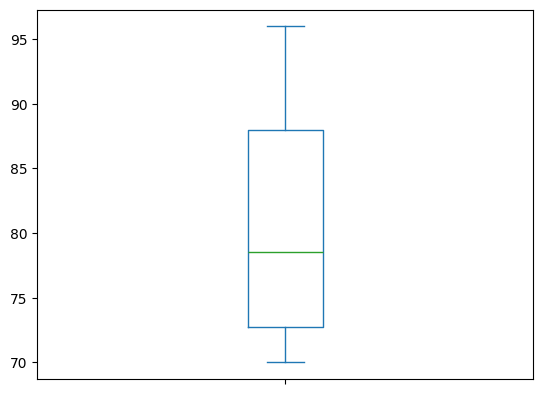

In [11]:
s.plot.box()

In [12]:
# student average score over the year = 81   

In [13]:
# student average score over the first halft of the school year is 85.4 
s.iloc[0:5].mean()

85.4

In [14]:
# the first half of the full school year, the student has an average grade of 85.4 which is higher than the average of the full year by 5.4%  
((s.iloc[0:5].mean() / s.mean()) - 1) * 100

5.432098765432114

In [15]:
first_half =s.iloc[0:5]

In [16]:
# student average score over the second half of the school year 
second_half = s.iloc[-5:]

In [17]:
second_half.mean()

76.6

In [18]:
# the average score of the student is lower in the second half of the school year which drive the performance of the full school year to be lower than the first half of the school year.  
# 2nd half year, the average grade is only 90% of the first half. which the student went from 85.4 to 76.6 

In [19]:
1 - (second_half.mean() / first_half.mean() )

0.10304449648711955

Beyond the exercise

In [20]:
# In which month did this student get their highest score? 

In [21]:
# solution 1: search for the index name using .index, then search for the highest value of the list of the index
s.index.max() 


'Sep'

In [22]:
# solution 2: use the build in method 
s.idxmax()

'Sep'

In [23]:
# solution 3: sorting the value of all the index, list from highest to lowest. the result is the first row
s.sort_values(ascending=False)

Sep    96
Jun    95
Oct    89
Nov    85
Jan    79
Dec    78
May    75
Mar    72
Feb    71
Apr    70
dtype: int64

In [24]:
# What were this student’s five highest scores?

In [25]:
five_highest_grade = s.sort_values(ascending=False)[0:5]

In [26]:
five_highest_grade

Sep    96
Jun    95
Oct    89
Nov    85
Jan    79
dtype: int64

In [27]:
# found the round(-1) solution from stackoverflow, seems like the fastest solution 
grade_round = s.round(-1)
grade_round

Sep    100
Oct     90
Nov     80
Dec     80
Jan     80
Feb     70
Mar     70
Apr     70
May     80
Jun    100
dtype: int64

Exercise 2: 

generate 10 test scores between 40 and 60, again using an index starting with September and ending with June. Find the mean of the scores and add the difference between the mean and 80 to each of the scores.

In [28]:
g2 = np.random.default_rng(0)
months = 'Sep Oct Nov Dec Jan Feb Mar Apr May Jun'.split()

s2 = Series(g2.integers(40, 60, 10),
          index=months)

s2

Sep    57
Oct    52
Nov    50
Dec    45
Jan    46
Feb    40
Mar    41
Apr    40
May    43
Jun    56
dtype: int64

In [29]:
s2.mean() 

47.0

In [30]:
80 - s2.mean()

33.0

In [31]:
# how to plot the scores. the mean, then the different?  !!!!

In [32]:
s2 + (80 - s2.mean())

Sep    90.0
Oct    85.0
Nov    83.0
Dec    78.0
Jan    79.0
Feb    73.0
Mar    74.0
Apr    73.0
May    76.0
Jun    89.0
dtype: float64

In [33]:
# There’s at least one other way to scale test scores: by looking at both the mean of the scores and their standard deviation. Anyone who scored within one standard deviation of the mean got a C (below the mean) or a B (above the mean). Anyone who scored more than one standard deviation above the mean got an A, and anyone who got more than one standard deviation below the mean got a D. During which months did our student get an A, B, C, and D?


In [34]:
s2.std()

6.411794687223781

In [35]:
s2.median()

45.5

<Axes: >

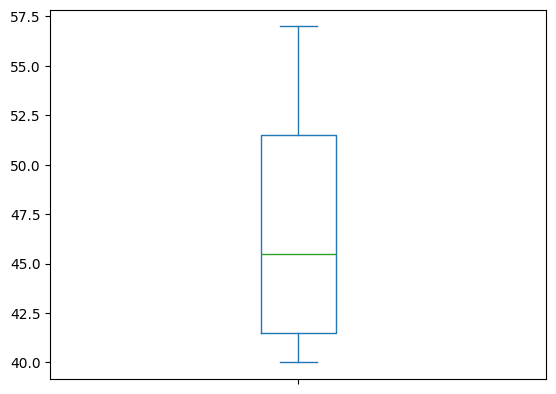

In [36]:
s2.plot.box()

In [37]:
s2.describe()

count    10.000000
mean     47.000000
std       6.411795
min      40.000000
25%      41.500000
50%      45.500000
75%      51.500000
max      57.000000
dtype: float64

In [38]:
s2.mean() - s2.std()

40.58820531277622

In [39]:
d_grade = s2[s2 < (s2.mean() - s2.std())]
d_grade

Feb    40
Apr    40
dtype: int64

In [40]:
a_grade = s2[s2 > (s2.mean() + s2.std())]
a_grade

Sep    57
Jun    56
dtype: int64

In [41]:
mean_value = s2.mean()  # Store mean value to avoid recalculating
std_value = s2.std()    # Store standard deviation for reuse

b_grade = s2[(s2 > mean_value) & (s2 < (mean_value + std_value))]
b_grade

Oct    52
Nov    50
dtype: int64

In [42]:
c_grade = s2[(s2 < mean_value) & (s2 > (mean_value - std_value))]
c_grade

Dec    45
Jan    46
Mar    41
May    43
dtype: int64

In [43]:
d_grade

Feb    40
Apr    40
dtype: int64

In [44]:
c_grade

Dec    45
Jan    46
Mar    41
May    43
dtype: int64

In [45]:
b_grade

Oct    52
Nov    50
dtype: int64

In [46]:
a_grade

Sep    57
Jun    56
dtype: int64

In [47]:
less_than_2std = s2[s2 < (mean_value - (std_value * 2))]
less_than_2std

Series([], dtype: int64)

# Exercise 3: Counting tens digits 

In [48]:
ex3 = np.random.randint(0, 100, 20) # this is to create a series with 20 digits, each digit is a random number from 0 to 100

#### Objective: 
- to understand the concept of operation inside a series 
- different approach to change a series type (float, int, and string)
- mask index through booleans operation  
- mask index for assignment and retrieval 
- retrieve multiple items from different indexes using fancy indexing: passing a list, series, or similar iterable indide the square brackets 


In [49]:
ex3

array([21, 66, 41, 43, 11, 51, 99, 96, 39, 45, 82, 48, 10, 27, 96, 92, 12,
       90, 67, 73])

In [50]:
ex3.dtype

dtype('int32')

In [51]:
# option 1: divided the value by 10, which will change the datatype of the series to 'floating' then using astype to convert the value back to interger 
ex3_o1 = ex3

In [52]:
# divided the values by 10
ex3_o1 = ex3_o1 / 10
ex3_o1

array([2.1, 6.6, 4.1, 4.3, 1.1, 5.1, 9.9, 9.6, 3.9, 4.5, 8.2, 4.8, 1. ,
       2.7, 9.6, 9.2, 1.2, 9. , 6.7, 7.3])

In [53]:
# change the type of the value to int  
ex3_o1.astype(np.int8)

array([2, 6, 4, 4, 1, 5, 9, 9, 3, 4, 8, 4, 1, 2, 9, 9, 1, 9, 6, 7],
      dtype=int8)

In [54]:
# option 2: using the '//' ('floordiv')
ex3_o2 = ex3 // 10 
ex3_o2

array([2, 6, 4, 4, 1, 5, 9, 9, 3, 4, 8, 4, 1, 2, 9, 9, 1, 9, 6, 7],
      dtype=int32)

In [55]:
ex3_o2[ex3_o2 > 0] 

array([2, 6, 4, 4, 1, 5, 9, 9, 3, 4, 8, 4, 1, 2, 9, 9, 1, 9, 6, 7],
      dtype=int32)

In [56]:
# option 3: convert the value into 'string' then using the string method to select the 1st letter of the string, then convert back value into int 
ex3_o3 = ex3.astype(str)
ex3_o3

array(['21', '66', '41', '43', '11', '51', '99', '96', '39', '45', '82',
       '48', '10', '27', '96', '92', '12', '90', '67', '73'], dtype='<U11')

In [57]:
ex3_o3.dtype

dtype('<U11')

In [58]:
# getting stuck at retrieving each value of the series 
ex3_o3_first = ex3_o3.str_slice(arr, 0, 1)

AttributeError: 'numpy.ndarray' object has no attribute 'str_slice'

In [59]:
type(ex3_o3)

numpy.ndarray

In [84]:
ex3_o3.astype(str).str.get(-2).fillna('0')

AttributeError: 'numpy.ndarray' object has no attribute 'str'

In [60]:
# skip this exercise for now.  



#### Beyond the exercise 
What if the range were from 0 to 10,000? How would that change your strategy, if at all?

Given a range from 0 to 10,000, what’s the smallest dtype you should use for integers?

Create a new series with 10 floating-point values between 0 and 1,000. Find the numbers whose integer component (i.e., ignoring any fractional part) are even.

In [ ]:
# selecting values with booleans by using boolean index or amask index 

In [61]:
sample = Series([10, 20, 30, 40, 50])
sample.loc[3]   # this is to select the 3rd index of the series data 

40

In [69]:
sample = Series([10, 20, 30, 40, 50])
sample.loc[sample < 30] 

# this will return the value of 10, 20. How does it work? first the system will search for each value inside the series to see whether the value is True or False given the condition "<30". 
# for the result that return true, "sample.loc" will locate the value to display  

0    10
1    20
dtype: int64

In [70]:
sample < 30

0     True
1     True
2    False
3    False
4    False
dtype: bool

In [71]:
sample.loc[sample <= sample.mean()]

0    10
1    20
2    30
dtype: int64

In [72]:
sample.mean()

30.0

In [73]:
sample.loc[sample <= sample.mean()] =999
# replace the values that satisfy with the condition which is [search for any value that is less than the mean of all of the values of sample series] then replace that values with the number '999'

sample## 

0    999
1    999
2    999
3     40
4     50
dtype: int64

to retrieve multiple items from differents indexes using fancy indexing: passing a list, series, or similar iterable inside the square brackets.  


In [74]:
sample.loc[[2,4]]
# to search for the item located at index no2 and no4
# the outer square brackets indicate that we want to retieve from 'sample' using 'loc' 
# the inner square brackets indicate that we want to retrive more than one items/values  
# this technique is called fancy indexing 
# the difference between fancy indexing and mask index (boolean index) is that mask index execute boolean operation  

2    999
4     50
dtype: int64

# Exercise 4: Descriptive statistics 

The mean, median, and standard deviation are three numbers we can use to get a better picture of our data. Adding a few other numbers can give us an even more complete picture. These descriptive statistics typically include the mean, standard deviation, minimum value, 25% quantile, median, 50% quantile, and maximum value. Understanding and using descriptive statistics is a key skill for anyone working with data, and in this exercise, you’ll practice doing so with the following:

- Generate a series of 100,000 floats in a normal distribution with a mean of 0 and a standard deviation of 100.

- Get the descriptive statistics for this series. How close are the mean and median? (You don’t need to calculate the difference; rather, consider why they aren’t the same.)

- Replace the minimum value with 5 times the maximum value.

- Get the descriptive statistics again. Did the mean, median, and standard deviations change from their previous values?

In [94]:
ex4 = np.random.default_rng(0)
ex4a = Series(ex4.normal(0, 100, 100_000))

In [95]:
ex4a


0         12.573022
1        -13.210486
2         64.042265
3         10.490012
4        -53.566937
            ...    
99995    -91.667135
99996   -231.480500
99997     -0.028179
99998   -109.645051
99999    -49.541294
Length: 100000, dtype: float64

In [96]:
ex4a.describe()

count    100000.000000
mean         -0.090825
std         100.013350
min        -449.411704
25%         -67.292120
50%          -0.414699
75%          67.636542
max         473.195769
dtype: float64

<Axes: >

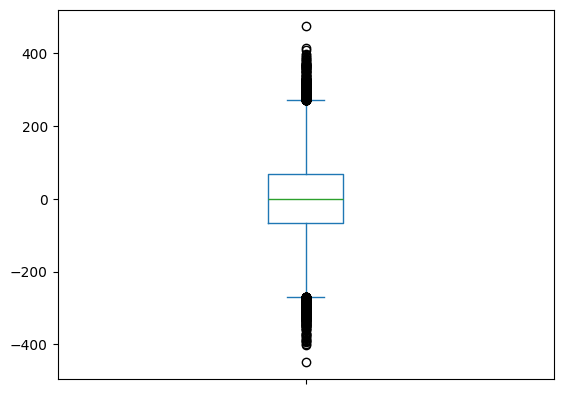

In [97]:
ex4a.plot.box()

In [98]:
ex4a.loc[ex4a == ex4a.min()] = ex4a.max()*5

# to replace the smallest avalue with the new value that is 5 time value of the current maximum value 

In [99]:
ex4a.describe()

count    100000.000000
mean         -0.062671
std         100.282770
min        -402.315865
25%         -67.288054
50%          -0.409289
75%          67.640758
max        2365.978844
dtype: float64

<Axes: >

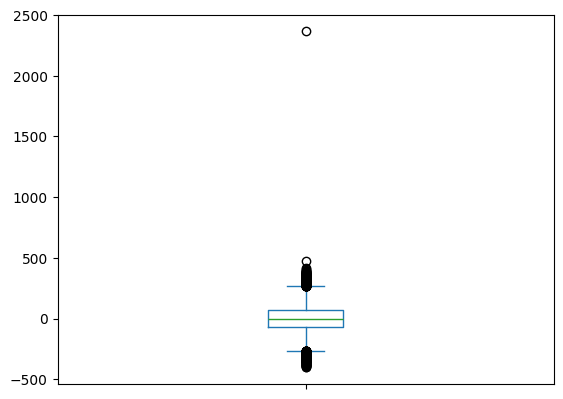

In [100]:
ex4a.plot.box()

### Beyong the exercise # 1
Demonstrate that 68%, 95%, and 99.7% of the values in s are indeed within one, two, and three standard distributions of the mean.`

In [ ]:
# to solve this question, search for the values that is within one, two, and three standard deviation of the mean 
# then use function count to check for how many values within this range, 
# then check for how many percentage of the data reprented in the Series 

In [106]:
ex4a_one_std = ex4a.loc[(ex4a < (ex4a.mean() + ex4a.std())) & (ex4a > (ex4a.mean() - ex4a.std()))].count()
ex4a_one_std

68523

In [110]:
ex4a_one_std / ex4a.count() * 100

68.523

In [111]:
ex4a_two_std = ex4a.loc[(ex4a < (ex4a.mean() + (2 * ex4a.std()))) & (ex4a > (ex4a.mean() - (2*ex4a.std())))].count()
ex4a_two_std

95511

In [112]:
ex4a_two_std / ex4a.count() * 100


95.511

In [113]:
ex4a_three_std = ex4a.loc[(ex4a < (ex4a.mean() + (3 * ex4a.std()))) & (ex4a > (ex4a.mean() - (3*ex4a.std())))].count()
ex4a_three_std

99718

In [115]:
ex4a_three_std / ex4a.count() * 100



99.71799999999999

### Beyong the exercise # 2
Calculate the mean of numbers greater than s.mean(). Then calculate the mean of numbers less than s.mean(). Is the average of these two numbers the same as s.mean()?

In [116]:
ex4a_higher_mean = ex4a.loc[ex4a > ex4a.mean()]
ex4a_higher_mean

0         12.573022
2         64.042265
3         10.490012
5         36.159505
6        130.400005
            ...    
99984     89.495997
99989     89.429832
99990     14.945091
99994    106.941152
99997     -0.028179
Length: 49853, dtype: float64

In [121]:
ex4a_higher_mean_mean = ex4a_higher_mean.mean()
ex4a_higher_mean_mean

# ex4a mean = -0.062671

79.98836624061157

In [127]:
ex4a_lower_mean = ex4a.loc[ex4a < ex4a.mean()]
ex4a_lower_mean

1        -13.210486
4        -53.566937
8        -70.373524
9       -126.542147
10       -62.327446
            ...    
99993     -5.925877
99995    -91.667135
99996   -231.480500
99998   -109.645051
99999    -49.541294
Length: 50147, dtype: float64

In [129]:
ex4a_lower_mean_mean = ex4a_lower_mean.mean()
ex4a_lower_mean_mean

-79.64438828596086

In [131]:
check_mean = (ex4a_higher_mean_mean + ex4a_lower_mean_mean) / 2
check_mean 

0.17198897732535556

In [ ]:
# the two numbers are different.  
# the original mean was -0.062671 
# the mean of the average mean of values higher than the orignal mean and the mean of the value lower than the origal mean is 0.17 

### Beyong the exercise # 3
What is the mean of the numbers beyond three standard deviations?

In [138]:
ex4a_beyond_3std = ex4a.loc[(ex4a > (ex4a.mean() + (ex4a.std()*3))) | (ex4a < (ex4a.mean() - (ex4a.std()*3)))]
ex4a_beyond_3std

219      306.603674
238     -310.633680
303     -377.227516
478     -389.942173
1059    -319.734539
            ...    
99137    319.338068
99162   -311.077922
99295   -385.391756
99383   -338.346042
99944   -311.237948
Length: 282, dtype: float64

In [141]:
ex4a_beyond_3std.count() /ex4a.count() * 100

0.28200000000000003

In [142]:
ex4a_beyond_3std.mean()

-2.02951883694736

# Exercise 5: Monday temperatures 

In [144]:
g = np.random.default_rng(0)
g.normal(20, 5, 28)

array([20.62865111, 19.33947568, 23.20211325, 20.52450059, 17.32165313,
       21.80797527, 26.52000023, 24.73540482, 16.48132382, 13.67289264,
       16.88362769, 20.2066299 ,  8.37484613, 18.90604168, 13.77044526,
       16.33866323, 17.27870509, 18.41849922, 22.05815268, 25.21256685,
       19.35732669, 26.83231735, 16.67402663, 21.75755035, 24.51735091,
       20.47006149, 16.28250375, 15.39137312])

In [145]:
days = 'Sun Mon Tue Wed Thu Fri Sat'.split()

In [148]:
ex5 = Series(g.normal(20, 5, 28),
            index = days * 4).round().astype(np.int8)
ex5

Sun    14
Mon    23
Tue    23
Wed    26
Thu    16
Fri    28
Sat    19
Sun    28
Mon    18
Tue    16
Wed    21
Thu    25
Fri    21
Sat    17
Sun    13
Mon    13
Tue    23
Wed    25
Thu    19
Fri    15
Sat    24
Sun    14
Mon    16
Tue    23
Wed     9
Thu    22
Fri    17
Sat    21
dtype: int8

In [149]:
ex5.loc['Mon']

Mon    23
Mon    18
Mon    13
Mon    16
dtype: int8

In [151]:
ex5.loc['Mon'].mean()

17.5

### Beyong the exercise # 1
What was the average weekend temperature (i.e., Saturdays and Sundays)?

In [154]:
ex5_weekend = ex5.loc[['Sat', 'Sun']]
ex5_weekend

Sat    19
Sat    17
Sat    24
Sat    21
Sun    14
Sun    28
Sun    13
Sun    14
dtype: int8

In [155]:
ex5_weekend.mean()

18.75

### Beyong the exercise # 2
How many times is the change in temperature from the previous day greater than 2 degrees?

In [156]:
ex5

Sun    14
Mon    23
Tue    23
Wed    26
Thu    16
Fri    28
Sat    19
Sun    28
Mon    18
Tue    16
Wed    21
Thu    25
Fri    21
Sat    17
Sun    13
Mon    13
Tue    23
Wed    25
Thu    19
Fri    15
Sat    24
Sun    14
Mon    16
Tue    23
Wed     9
Thu    22
Fri    17
Sat    21
dtype: int8

In [159]:
higher_temp_days = ex5[ex5.diff() > 2]
higher_temp_days

Mon    23
Wed    26
Fri    28
Sun    28
Wed    21
Thu    25
Tue    23
Sat    24
Tue    23
Thu    22
Sat    21
dtype: int8

### Beyong the exercise # 3
What are the two most common temperatures in our data set, and how often does each appear?

In [164]:
ex5.value_counts()

23    4
16    3
21    3
14    2
28    2
19    2
25    2
17    2
13    2
26    1
18    1
15    1
24    1
9     1
22    1
Name: count, dtype: int64

In [ ]:
# Exercise 6: Passenger frequency


 to show what percentage of taxi rides had only one passenger versus the (theoretical) maximum of six passengers.

In [166]:
filepath = r"C:\Users\dqthi\Downloads\pandas-workout-data\data\taxi-passenger-count.csv"

ex6 = pd.read_csv(filepath, header=None).squeeze()

In [167]:
ex6

0       1
1       1
2       1
3       1
4       1
       ..
9994    1
9995    1
9996    1
9997    6
9998    1
Name: 0, Length: 9999, dtype: int64

In [168]:
ex6.value_counts()

0
1    7207
2    1313
5     520
3     406
6     369
4     182
0       2
Name: count, dtype: int64

In [170]:
ex6.value_counts()/ ex6.count() * 100 

0
1    72.077208
2    13.131313
5     5.200520
3     4.060406
6     3.690369
4     1.820182
0     0.020002
Name: count, dtype: float64

In [171]:
ex6.value_counts()[[1, 6]]

0
1    7207
6     369
Name: count, dtype: int64

In [172]:
ex6.value_counts()[[1, 6]] / ex6.count() * 100 

0
1    72.077208
6     3.690369
Name: count, dtype: float64

In [173]:
ex6.value_counts(normalize= True)[[1, 6]]
# `value_counts` has an optional `normalize` parameter that returns the fraction if set to `True`

0
1    0.720772
6    0.036904
Name: proportion, dtype: float64

#### Beyong the exercise: 
What are the 25%, 50% (median), and 75% quantiles for this data set? Can you guess the results before you execute the code?

In [174]:
ex6.describe()

count    9999.000000
mean        1.659466
std         1.333306
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         6.000000
Name: 0, dtype: float64

<Axes: >

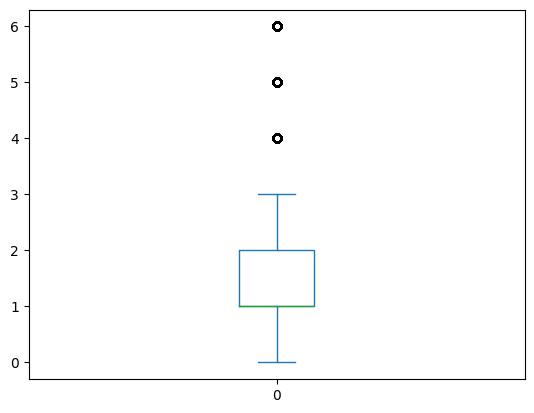

In [175]:
ex6.plot.box()

What proportion of taxi rides are for three, four, five, or six passengers?

In [177]:
ex6.value_counts(normalize=True)[[3, 4,5, 6]] * 100

0
3    4.060406
4    1.820182
5    5.200520
6    3.690369
Name: proportion, dtype: float64

In [178]:
ex6.value_counts(normalize=True)[[1, 2]] * 100

0
1    72.077208
2    13.131313
Name: proportion, dtype: float64

Consider that you’re in charge of vehicle licensing for New York taxis. Given these numbers, would more people benefit from smaller taxis that can take only one or two passengers or larger taxis that can take five or six passengers?

As the majority of users are taking taxi are 1 or 2 people that account for more than 85 percentage of the sample => suggest that taxi will smaller size is more favoriable  

# Exercise 7: Long, medium, and short taxi rides 

modify the series (or create another series) containing category names rather than numbers based on these criteria:

Short, ≤ 2 miles

Medium, > 2 miles but ≤ 10 miles

Long, > 10 miles

Calculate the number of rides in each category.

In [182]:
filepath = r"C:\Users\dqthi\Downloads\pandas-workout-data\data\taxi-distance.csv"

ex7 = pd.read_csv(filepath, header=None).squeeze()

In [183]:
ex7

0       1.63
1       0.46
2       0.87
3       2.13
4       1.40
        ... 
9994    2.70
9995    4.50
9996    5.59
9997    1.54
9998    5.80
Name: 0, Length: 9999, dtype: float64

In [185]:
pd.cut( ex7, 
        bins = [0, 2, 10, ex7.max()], # what if I want to make it become 4 bins? 
        include_lowest=True,
        labels=['short', 'medium', 'long']
        )

0        short
1        short
2        short
3       medium
4        short
         ...  
9994    medium
9995    medium
9996    medium
9997     short
9998    medium
Name: 0, Length: 9999, dtype: category
Categories (3, object): ['short' < 'medium' < 'long']

In [196]:
ex7a = pd.cut( ex7, 
        bins = [0, 2, 10, ex7.max()], # what if I want to make it become 4 bins? 
        include_lowest=True,
        labels=['short', 'medium', 'long']
        )
ex7a

0        short
1        short
2        short
3       medium
4        short
         ...  
9994    medium
9995    medium
9996    medium
9997     short
9998    medium
Name: 0, Length: 9999, dtype: category
Categories (3, object): ['short' < 'medium' < 'long']

In [189]:

categories = ex7.astype(str) # this is to create a new series that based on the value of of series 'ex7' 
categories.loc[:] ='medium ' # then find the value 
categories.loc[ex7 <= 2] = 'short'
categories.loc[ex7 > 10] = 'long'
categories.value_counts()

0
short      5890
medium     3402
long        707
Name: count, dtype: int64

In [192]:
categories2 = ex7.astype(str)
categories2.loc[categories2 < 2] = 'testing 2'
# TypeError: '<' not supported between instances of 'str' and 'int'
# as Series Catergories2 is already type str, it is not possible to execute operation => to do so, i need to use the value of series ex7 

TypeError: '<' not supported between instances of 'str' and 'int'

In [190]:
categories

0         short
1         short
2         short
3       medium 
4         short
         ...   
9994    medium 
9995    medium 
9996    medium 
9997      short
9998    medium 
Name: 0, Length: 9999, dtype: object

In [187]:
ex7

0       1.63
1       0.46
2       0.87
3       2.13
4       1.40
        ... 
9994    2.70
9995    4.50
9996    5.59
9997    1.54
9998    5.80
Name: 0, Length: 9999, dtype: float64

Compare the mean and median trip distances. What does that tell you about the distribution of the data?

In [194]:
ex7.describe()

count    9999.000000
mean        3.158511
std         4.037516
min         0.000000
25%         1.000000
50%         1.700000
75%         3.300000
max        64.600000
Name: 0, dtype: float64

<Axes: >

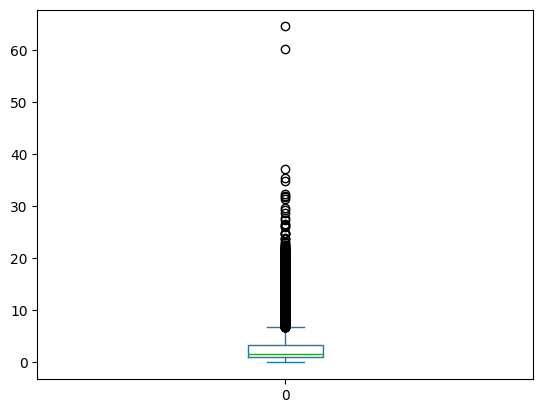

In [195]:
ex7.plot.box()

In [ ]:
# the mean is significantlhy higher than the median => the majority of the data is located between  1-3.3km(or miles)
# the mean is relatively higher than the median is due to the number of outliners as seen in the picture 

How many short, medium, and long trips were there for trips that had only one passenger? Note that the data for passenger count and trip length is from the same data set, meaning the indexes are the same.


In [199]:
ex7a.value_counts()[ex6]

C:\Users\dqthi\AppData\Local\Temp\ipykernel_27232\1437681155.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ex7a.value_counts()[ex6[1]]


3402

In [208]:
ex6.value_counts()[1]

7207

In [227]:
ex7a[ex6 == 1].value_counts() 

0
short     4333
medium    2387
long       487
Name: count, dtype: int64

In [215]:
help(ex7.value_counts)

Help on method value_counts in module pandas.core.base:

value_counts(normalize: 'bool' = False, sort: 'bool' = True, ascending: 'bool' = False, bins=None, dropna: 'bool' = True) -> 'Series' method of pandas.core.series.Series instance
    Return a Series containing counts of unique values.
    
    The resulting object will be in descending order so that the
    first element is the most frequently-occurring element.
    Excludes NA values by default.
    
    Parameters
    ----------
    normalize : bool, default False
        If True then the object returned will contain the relative
        frequencies of the unique values.
    sort : bool, default True
        Sort by frequencies when True. Preserve the order of the data when False.
    ascending : bool, default False
        Sort in ascending order.
    bins : int, optional
        Rather than count values, group them into half-open bins,
        a convenience for ``pd.cut``, only works with numeric data.
    dropna : bool, defa

In [218]:
ex6

0       1
1       1
2       1
3       1
4       1
       ..
9994    1
9995    1
9996    1
9997    6
9998    1
Name: 0, Length: 9999, dtype: int64

In [220]:
ex7a

0        short
1        short
2        short
3       medium
4        short
         ...  
9994    medium
9995    medium
9996    medium
9997     short
9998    medium
Name: 0, Length: 9999, dtype: category
Categories (3, object): ['short' < 'medium' < 'long']

What happens if you don’t pass explicit intervals and instead ask pd.cut to just create three bins, with bins=3?

In [229]:
ex7b = pd.cut( ex7, 
        bins = 3, # what if I want to make it become 4 bins? 
        include_lowest=True,
        labels=['short', 'medium', 'long']
        )
ex7b

0       short
1       short
2       short
3       short
4       short
        ...  
9994    short
9995    short
9996    short
9997    short
9998    short
Name: 0, Length: 9999, dtype: category
Categories (3, object): ['short' < 'medium' < 'long']

In [231]:
ex7b.value_counts()

0
short     9955
medium      42
long         2
Name: count, dtype: int64

# Summary 
new function that I learn from this chapter: 
- `.diff()` to calculate the difference between index value following by orders 
- `pd.cut` to calculate bin of the data 
- how to use value of 1 series as a condition for another series. Assuming the two series have the same index